In [1]:
import pandas as pd 
import numpy as np 
import PyPDF2
from tabula import read_pdf
import requests, io
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance 

font = {'size': 22}
matplotlib.rc('font', **font)


%matplotlib inline

In [2]:
range_list = pd.date_range('2017-01-01','2019-09-30', freq='MS').strftime("%Y%m").tolist()

In [3]:
def download_figure2(month):
    link = 'https://www.cathaypacific.com/dam/cx/about-us/investor-relations/announcements/en/{}_cxtraffic_en.pdf'.format(month)
    response = requests.get(link)
    if response.status_code == 404:
        link = 'https://www.cathaypacific.com/dam/cx/about-us/investor-relations/announcements/en/{}_cxtraffic_en.PDF'.format(month)
        response = requests.get(link)    
    with io.BytesIO(response.content) as open_pdf_file:
        pdf_file  = PyPDF2.PdfFileReader(open_pdf_file)
        num_pages = pdf_file.getNumPages() 
    
    table  = read_pdf(link, pages = num_pages-1) 
    if pd.isnull(table.iloc[0,0]):
        table = table.iloc[:,1:]
    table=table.iloc[:, :2] 
    table.rename(columns={ table.columns[0]: 'Figure',table.columns[1]: "Number" },inplace=True)  
    
    rpk = table.iloc[table[table.iloc[:,0]=='RPK (000)'].index[0]+1:table[table.iloc[:,0]=='Number of flights'].index[0]+1,:]
    apk = table.iloc[table[table.iloc[:,0]=='ASK (000)'].index[0]+1:table[table.iloc[:,0]=='ATK (000)'].index[0]+1,:]

    rpk['Month'] = month
    apk['Month'] = month
    return rpk, apk

In [4]:
traffic = pd.DataFrame(columns=['Figure','Number','Month'])
capacity =  pd.DataFrame(columns=['Figure','Number','Month'])

for i in range_list:
    rpk, apk = download_figure2(i)
    traffic = traffic.append(rpk)
    capacity = capacity.append(apk)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:20]
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:21]


In [5]:
capacity[pd.isnull(capacity['Number'])]

,Figure,Number,Month
26,ATK (000),NaN,201710
30,Sri Lanka,NaN,201711
32,Africa,NaN,201711
38,(000),NaN,201711
30,Sri Lanka,NaN,201804
32,Africa,NaN,201804
38,(000),NaN,201804


In [6]:
traffic[pd.isnull(traffic['Number'])]

,Figure,Number,Month
9,Sri Lanka,NaN,201711
11,Africa,NaN,201711
17,km (000),NaN,201711
9,Sri Lanka,NaN,201804
11,Africa,NaN,201804
17,km (000),NaN,201804


In [7]:
capacity.loc[(capacity['Month']=='201710') & (capacity['Figure']=='ATK (000)'),'Number']=2706503

In [8]:
capacity = capacity[pd.isnull(capacity['Number'])==False]
traffic = traffic[pd.isnull(traffic['Number'])==False]

In [9]:
set(capacity.groupby('Month').agg({'Number':'count'})['Number'])

{12}

In [10]:
set(traffic.groupby('Month').agg({'Number':'count'})['Number'])

{12}

In [11]:
set(capacity['Figure'])

{'- Europe',
 '- India, Middle East, Pakistan &',
 '- India, Middle East, Pakistan &\rSri Lanka',
 '- Mainland China',
 '- North America',
 '- North East Asia',
 '- South Asia, Middle East  &\rAfrica',
 '- South East Asia',
 '- South West Pacific',
 '- South West Pacific & South',
 '- South West Pacific & South\rAfrica',
 'ASK Total (000)',
 'ATK (000)',
 'Available cargo/mail tonne km',
 'Available cargo/mail tonne km\r(000)',
 'Cargo and mail load factor',
 'Passenger load factor'}

In [12]:
set(traffic['Figure'])

{'- Europe',
 '- India, Middle East, Pakistan &',
 '- India, Middle East, Pakistan &\rSri Lanka',
 '- Mainland China',
 '- North America',
 '- North East Asia',
 '- South Asia, Middle East  &\rAfrica',
 '- South East Asia',
 '- South West Pacific',
 '- South West Pacific & South',
 '- South West Pacific & South\rAfrica',
 'Cargo and mail carried (000kg)',
 'Cargo and mail revenue tonne',
 'Cargo and mail revenue tonne\rkm (000)',
 'Number of flights',
 'Passengers carried',
 'RPK Total (000)'}

In [13]:
for table in [capacity,traffic]:

    table.loc[table['Figure']=='- India, Middle East, Pakistan &','Figure'] = '- India, Middle East, Pakistan & Sri Lanka'
    table.loc[table['Figure']=='- India, Middle East, Pakistan &\rSri Lanka','Figure'] = '- India, Middle East, Pakistan & Sri Lanka'
    table.loc[table['Figure']=='- South Asia, Middle East  &\rAfrica','Figure'] = '- South Asia, Middle East  & Africa'
    table.loc[table['Figure']=='- South West Pacific & South\rAfrica','Figure'] = '- South West Pacific & South Africa'
    table.loc[table['Figure']=='- South West Pacific & South','Figure'] = '- South West Pacific & South Africa'
    table.loc[table['Figure']=='Available cargo/mail tonne km\r(000)','Figure'] = 'Available cargo/mail tonne km (000)'
    table.loc[table['Figure']=='Available cargo/mail tonne km','Figure'] = 'Available cargo/mail tonne km (000)'
    table.loc[table['Figure']=='Cargo and mail revenue tonne\rkm (000)','Figure'] = 'Cargo and mail revenue tonne km (000)'
    table.loc[table['Figure']=='Cargo and mail revenue tonne','Figure'] = 'Cargo and mail revenue tonne km (000)'

In [14]:
set(capacity['Figure'])

{'- Europe',
 '- India, Middle East, Pakistan & Sri Lanka',
 '- Mainland China',
 '- North America',
 '- North East Asia',
 '- South Asia, Middle East  & Africa',
 '- South East Asia',
 '- South West Pacific',
 '- South West Pacific & South Africa',
 'ASK Total (000)',
 'ATK (000)',
 'Available cargo/mail tonne km (000)',
 'Cargo and mail load factor',
 'Passenger load factor'}

In [15]:
set(traffic['Figure'])

{'- Europe',
 '- India, Middle East, Pakistan & Sri Lanka',
 '- Mainland China',
 '- North America',
 '- North East Asia',
 '- South Asia, Middle East  & Africa',
 '- South East Asia',
 '- South West Pacific',
 '- South West Pacific & South Africa',
 'Cargo and mail carried (000kg)',
 'Cargo and mail revenue tonne km (000)',
 'Number of flights',
 'Passengers carried',
 'RPK Total (000)'}

In [16]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 1 to 12
Data columns (total 3 columns):
Figure    396 non-null object
Number    396 non-null object
Month     396 non-null object
dtypes: object(3)
memory usage: 12.4+ KB


In [17]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 15 to 26
Data columns (total 3 columns):
Figure    396 non-null object
Number    396 non-null object
Month     396 non-null object
dtypes: object(3)
memory usage: 12.4+ KB


In [18]:
traffic['Number'] =traffic['Number'].str.replace(',', '')

In [19]:
capacity['Number'] =capacity['Number'].str.replace(',', '')

In [20]:
capacity['Number'] =capacity['Number'].str.replace('%', '')

In [21]:
traffic['Number'] = traffic['Number'].astype(float)
capacity['Number'] = capacity['Number'].astype(float)

In [22]:
dest = ['- Europe',
 '- Mainland China',
 '- North America',
 '- North East Asia',
 '- South East Asia',]

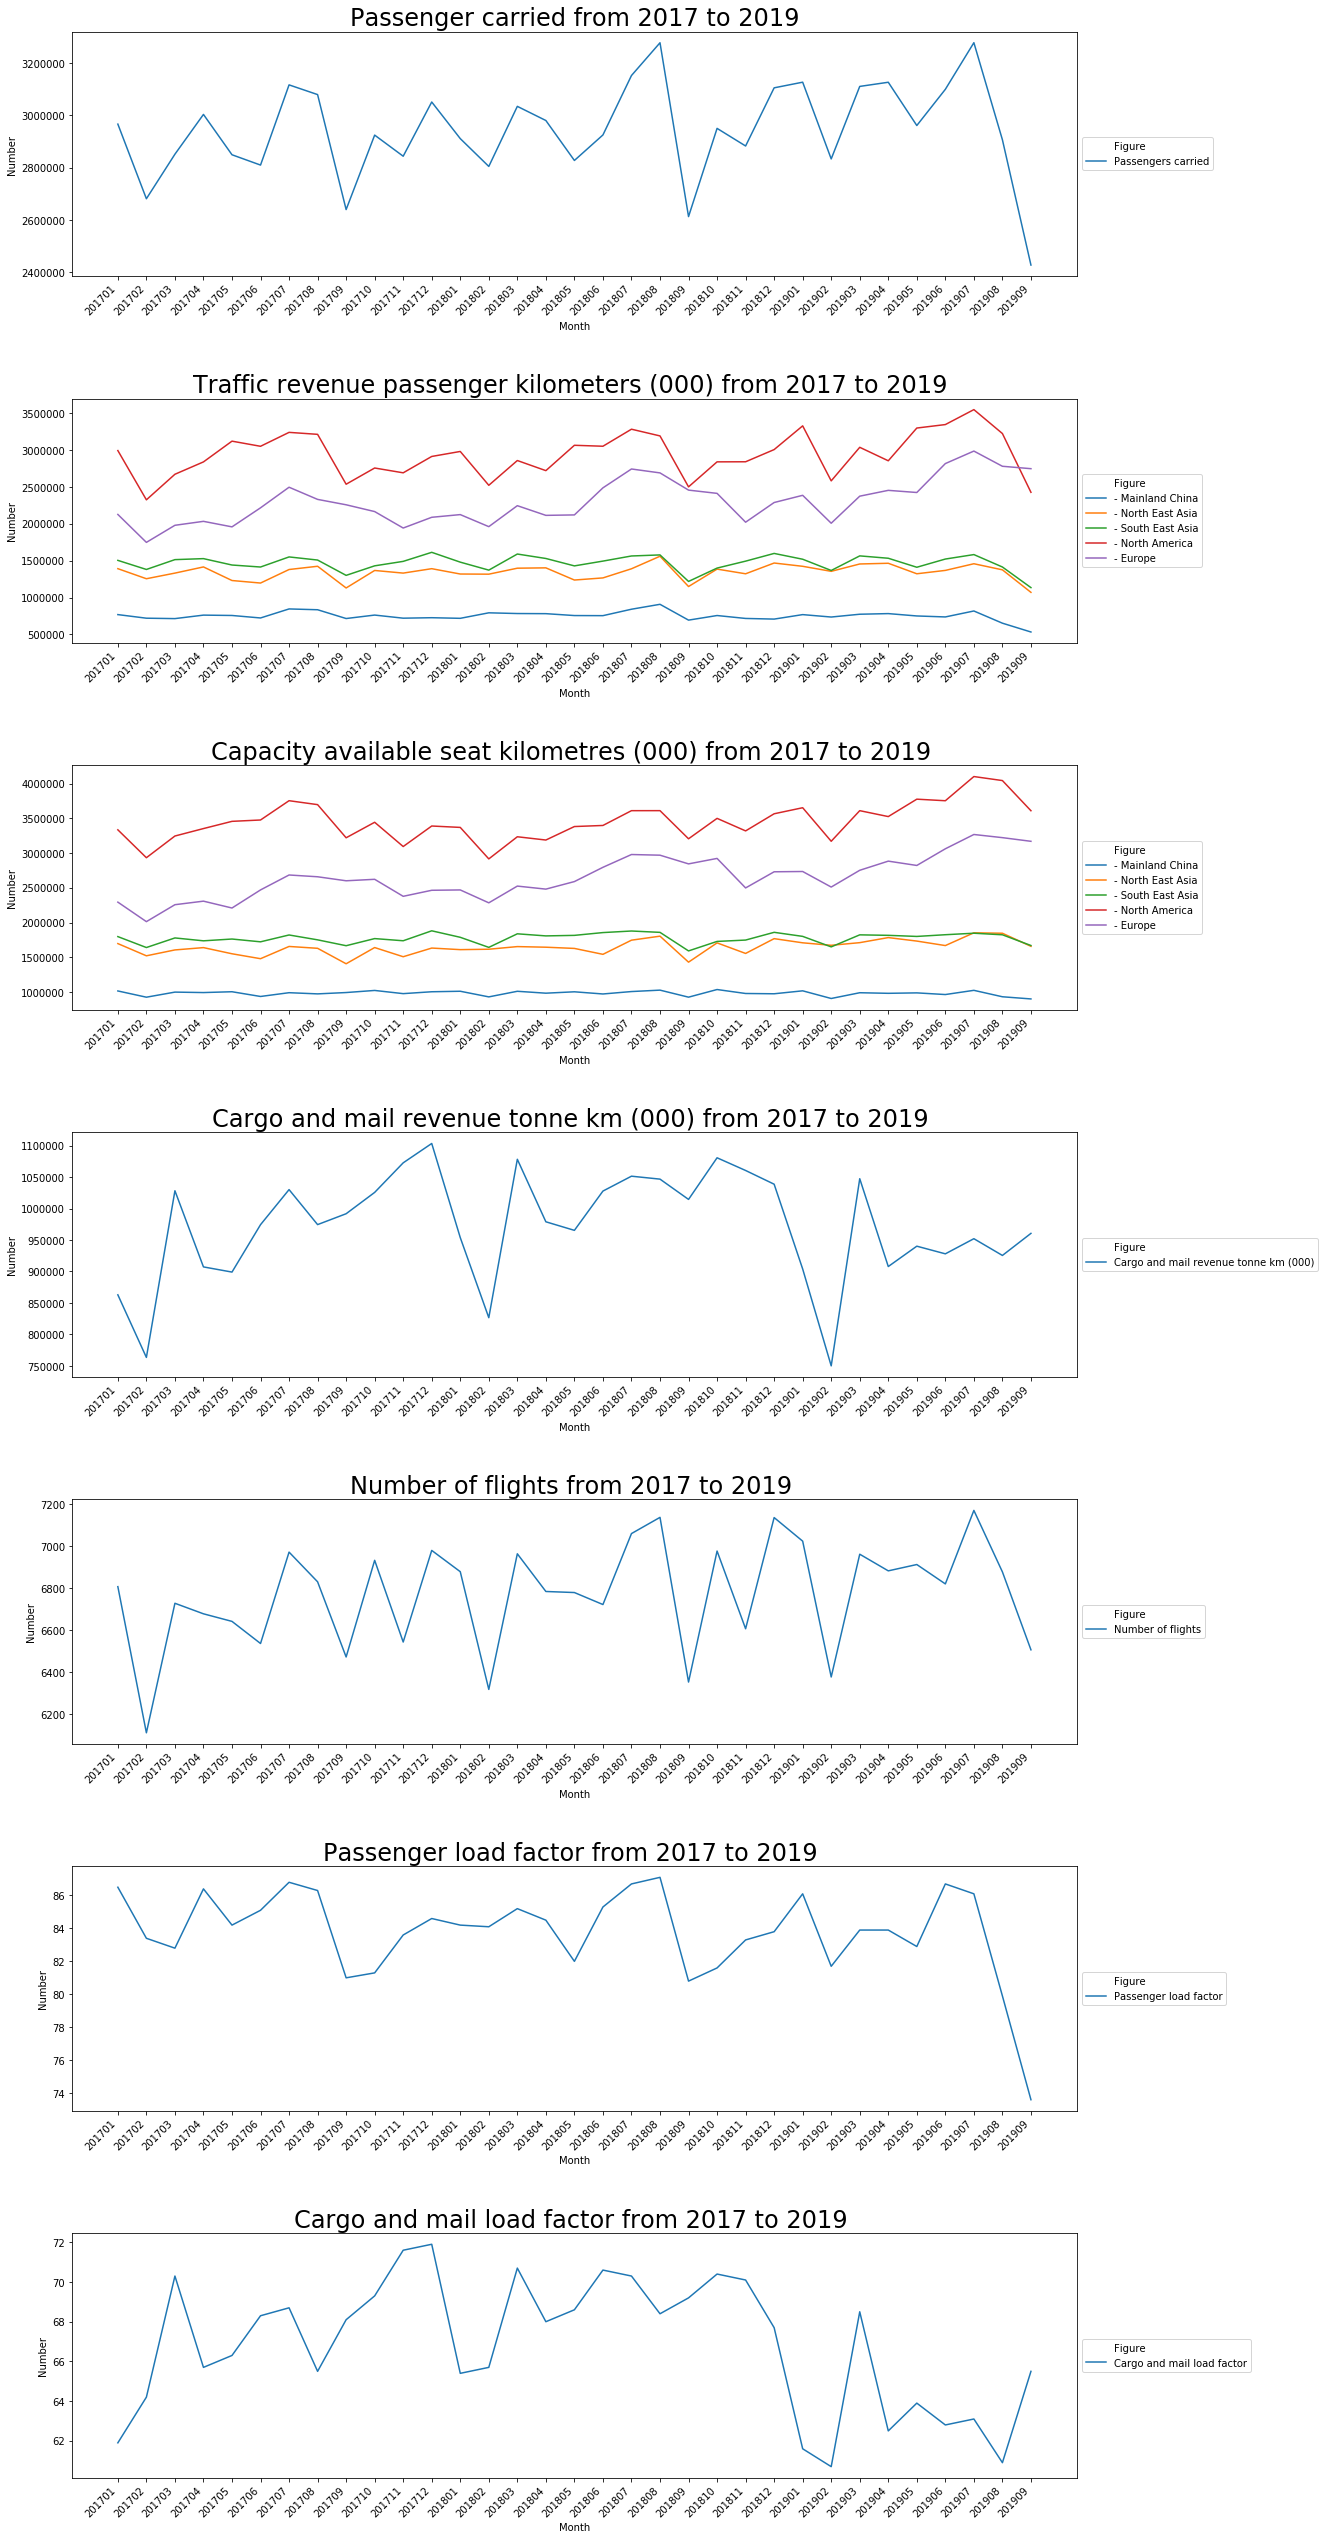

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(18, 45))

ax1 = sns.lineplot(data=traffic[traffic['Figure']=='Passengers carried' ],x='Month',y='Number', hue = 'Figure', ax=ax1)
ax1.set_xticklabels(labels=traffic['Month'].unique(), rotation=45, ha='right')
ax1.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax1.set_title("Passenger carried from 2017 to 2019",fontsize= 24)

ax2 = sns.lineplot(data=traffic[traffic['Figure'].isin(dest) ],x='Month',y='Number', hue = 'Figure', ax=ax2)
ax2.set_xticklabels(labels=traffic['Month'].unique(), rotation=45, ha='right')
ax2.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax2.set_title("Traffic revenue passenger kilometers (000) from 2017 to 2019 ",fontsize= 24)

ax3 = sns.lineplot(data=capacity[capacity['Figure'].isin(dest) ],x='Month',y='Number', hue = 'Figure', ax=ax3)
ax3.set_xticklabels(labels=capacity['Month'].unique(), rotation=45, ha='right')
ax3.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax3.set_title("Capacity available seat kilometres (000) from 2017 to 2019 ",fontsize= 24)

ax4 = sns.lineplot(data=traffic[traffic['Figure']=='Cargo and mail revenue tonne km (000)' ],x='Month',y='Number', hue = 'Figure', ax=ax4)
ax4.set_xticklabels(labels=traffic['Month'].unique(), rotation=45, ha='right')
ax4.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax4.set_title("Cargo and mail revenue tonne km (000) from 2017 to 2019 ",fontsize= 24)

ax5 = sns.lineplot(data=traffic[traffic['Figure']=='Number of flights' ],x='Month',y='Number', hue = 'Figure', ax=ax5)
ax5.set_xticklabels(labels=traffic['Month'].unique(), rotation=45, ha='right')
ax5.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax5.set_title("Number of flights from 2017 to 2019 ",fontsize= 24)

ax6 = sns.lineplot(data=capacity[capacity['Figure']=='Passenger load factor' ],x='Month',y='Number', hue = 'Figure', ax=ax6)
ax6.set_xticklabels(labels=capacity['Month'].unique(), rotation=45, ha='right')
ax6.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax6.set_title("Passenger load factor from 2017 to 2019 ",fontsize= 24)

ax7 = sns.lineplot(data=capacity[capacity['Figure']=='Cargo and mail load factor' ],x='Month',y='Number', hue = 'Figure', ax=ax7)
ax7.set_xticklabels(labels=capacity['Month'].unique(), rotation=45, ha='right')
ax7.legend(bbox_to_anchor=(1,0.5), loc="center left")
ax7.set_title("Cargo and mail load factor from 2017 to 2019 ",fontsize= 24)


fig.subplots_adjust(hspace=.5)
plt.show()

In [24]:
stock_price = yfinance.download("0293.hk", start="2017-01-01", end="2019-10-1",interval = "1mo")

[*********************100%***********************]  1 of 1 downloaded


In [25]:
stock_price = stock_price[pd.isnull(stock_price['Volume'])==False]

In [26]:
stock_price['Month'] = stock_price.index.strftime('%Y-%m')

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:1]


In [27]:
stock_price.reset_index(inplace=True)
stock_price = stock_price[['Month','Close']]

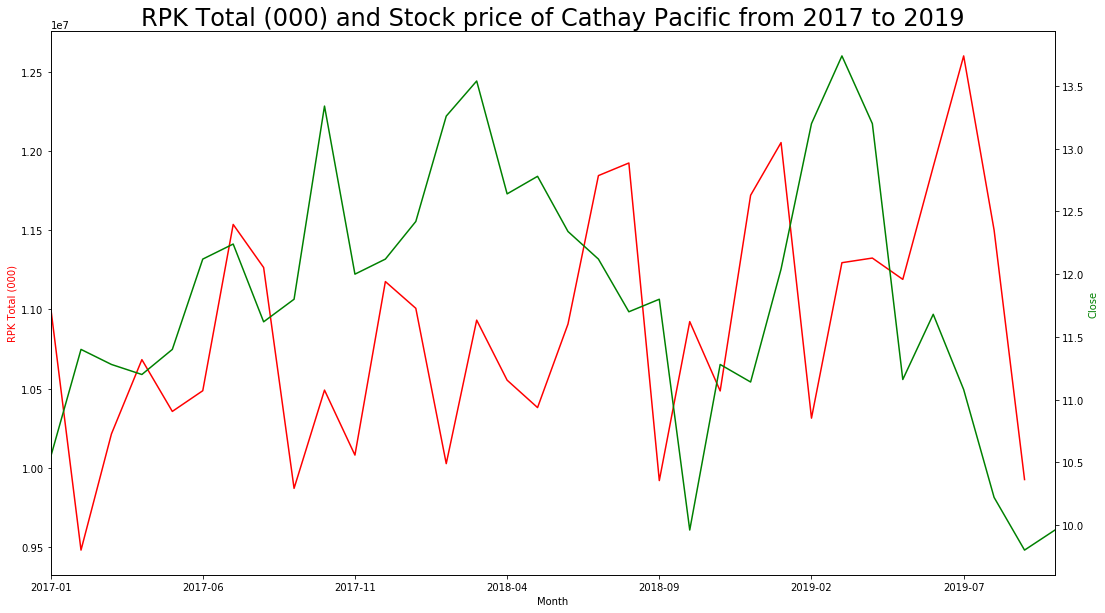

In [28]:
fig, ax1 = plt.subplots(figsize=(18, 10))
ax1 = traffic[traffic['Figure']=='RPK Total (000)'].plot(x='Month', y="Number", ax=ax1, legend=False, color = 'red')
ax1.set_xlabel('Month')
ax1.set_ylabel('RPK Total (000)', color='red')
ax2 = ax1.twinx()
ax2 = stock_price.plot(x='Month', y="Close", ax=ax2, legend=False, color='green')
ax2.set_ylabel('Close', color='green')

plt.title('RPK Total (000) and Stock price of Cathay Pacific from 2017 to 2019',fontsize= 24)
plt.show()